In [1]:
import torch
import numpy as np
import cv2
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

---------------------------------------------------- этап 1 (загружаем картинку-поле) ----------------------------------------------------

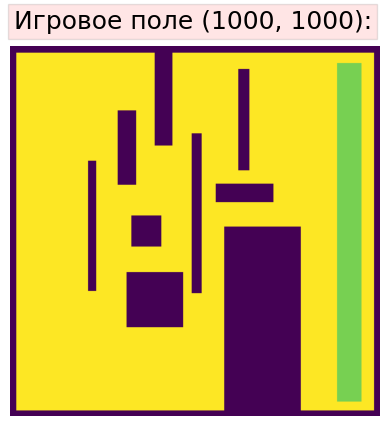

In [40]:
# загружаем картинку (картинка должна быть латиницей):
pic = cv2.imread('Labirint_sq.png', 0) #.transpose(-1,0,1)
# смотрим картинку:
f, ax = plt.subplots()
plt.imshow(pic)
plt.axis('off')
plt.text(.01, +1.1, f'Игровое поле {pic.shape}:', ha='left', va='top',fontsize=18, transform=ax.transAxes, bbox={"facecolor":"r", "alpha":0.1})
plt.show()

In [41]:
print(pic)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
# открытие картинка в отдельном окне
cv2.imshow('image',pic)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
# изменение размера картинки
# pic = pic.transpose(-1,0,1) # меняем каналы с (800, 1200, 3) на (3, 800, 1200)
print(pic.shape)
label_mask_real_size = cv2.resize(pic, (100, 100), interpolation=cv2.INTER_NEAREST)
label_mask_real_size


(1000, 1000)


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ..., 255, 255,   0],
       ...,
       [  0,   0, 255, ..., 255, 255,   0],
       [  0,   0, 255, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], shape=(100, 100), dtype=uint8)

In [45]:
label_mask_real_size[50]

array([  0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0, 255, 255,
       255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
         0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,
       255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 203, 203,
       203, 203, 203, 203, 255, 255, 255, 255,   0], dtype=uint8)

In [46]:
# добавили агента, но он маленький совсем))))
label_mask_real_size[50][8] = 60


In [47]:
# смотрим измененную картинку
res = cv2.resize(label_mask_real_size, dsize=(400,400), interpolation=cv2.INTER_CUBIC)
# cv2.namedWindow("Resized", cv2.WINDOW_NORMAL)
cv2.imshow('image',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
# проверяем значения в матрице, нужно, чтобы их не было больше, или меньше, чем нужно
h = []
for i in label_mask_real_size:
    # print(set(i))
    for _ in i: 
        if _ not in h:
            h.append(_)
print([int(j) for j in h])



[0, 255, 203, 60]


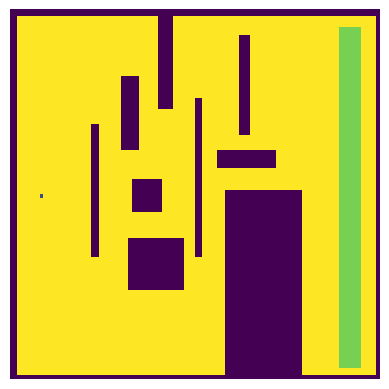

In [49]:
plt.imshow(label_mask_real_size)
plt.axis('off')
# plt.text(.01, +1.1, f'Игровое поле {pic.shape}:', ha='left', va='top',fontsize=18, transform=ax.transAxes, bbox={"facecolor":"r", "alpha":0.1})
plt.show()

In [50]:
label_mask_real_size

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ..., 255, 255,   0],
       ...,
       [  0,   0, 255, ..., 255, 255,   0],
       [  0,   0, 255, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], shape=(100, 100), dtype=uint8)

In [51]:
# переводим цифры в буквы по словарю
area = []
dct = {0: 'H', 60: 'S', 203: 'G', 255: 'F'}
for i in label_mask_real_size:
    # print(f'i:{len(i)}')
    fox = ''.join([dct[_] for _ in i])
    # print(len(fox))
    
    area.append(fox)
print(len(area))

100


In [52]:
# проверяем значения в матрице, нужно, чтобы их не было больше, или меньше, чем нужно
h = []
for i in area:
    # print(set(i))
    for _ in i: 
        if _ not in h:
            h.append(_)
print(h)

['H', 'F', 'G', 'S']


In [53]:
# записываем таблицу в файл area.txt
with open('area.txt', 'w+') as f:
    
    # write elements of list
    for items in area:
        f.write('%s\n' %items)
    
    print("File written successfully")

File written successfully


# ***Результирующая картинка для подачи в модель area***